

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [22]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [23]:
# your code here
# use many cells if you like to structure your code well

from IPython.display import HTML
google_sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1"

embed_url = google_sheet_url.replace("/edit?h1=en#", "/preview?")


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".


b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [24]:
# your code here
# use many cells if you like to structure your code well

#a
csv_file_path = "Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv"

df= pd.read_csv(csv_file_path, header=1)





In [25]:
#b


print(df.head())

     Year     Month Taliban Civilians Afghan forces  \
0  2004.0   January      15        51            23   
1  2004.0  February     NaN         7             4   
2  2004.0     March      19         2           NaN   
3  2004.0     April       5         3            19   
4  2004.0       May      18        29            56   

  Nato (detailed in spreadsheet)  Nato - official figures  
0                            NaN                     11.0  
1                              5                      2.0  
2                              2                      3.0  
3                            NaN                      3.0  
4                              6                      9.0  


In [26]:
#c
column_names = list(df.columns.values)

print(column_names)

column_value_dict = {col: df[col].iloc[0] for col in df.columns}

#for the column names i do not know how to extract the right names (countries)

print(column_value_dict)

['Year', 'Month', 'Taliban', 'Civilians', 'Afghan forces', 'Nato (detailed in spreadsheet)', 'Nato - official figures']
{'Year': np.float64(2004.0), 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': np.float64(11.0)}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

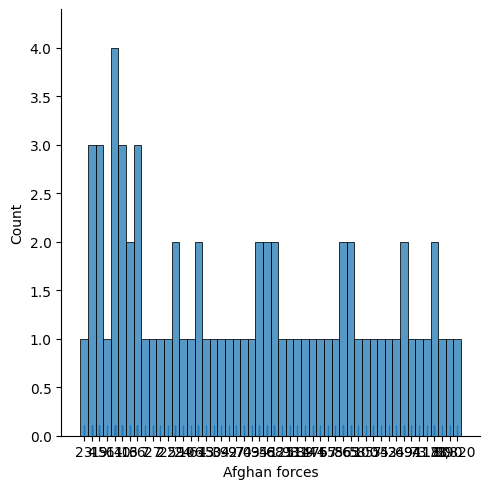

In [27]:
# your code here
# use many cells if you like to structure your code well


Afghan_forces = sns.displot(df['Afghan forces'], kde=False, rug= True)




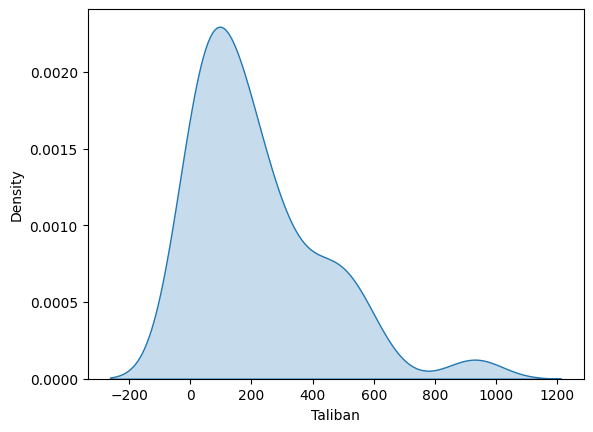

In [28]:
#b

df['Taliban'] = pd.to_numeric(df['Taliban'], errors= 'coerce')
df_cleaned = df.dropna(subset= ['Taliban'])

_ = sns.kdeplot(df_cleaned['Taliban'], fill = True)

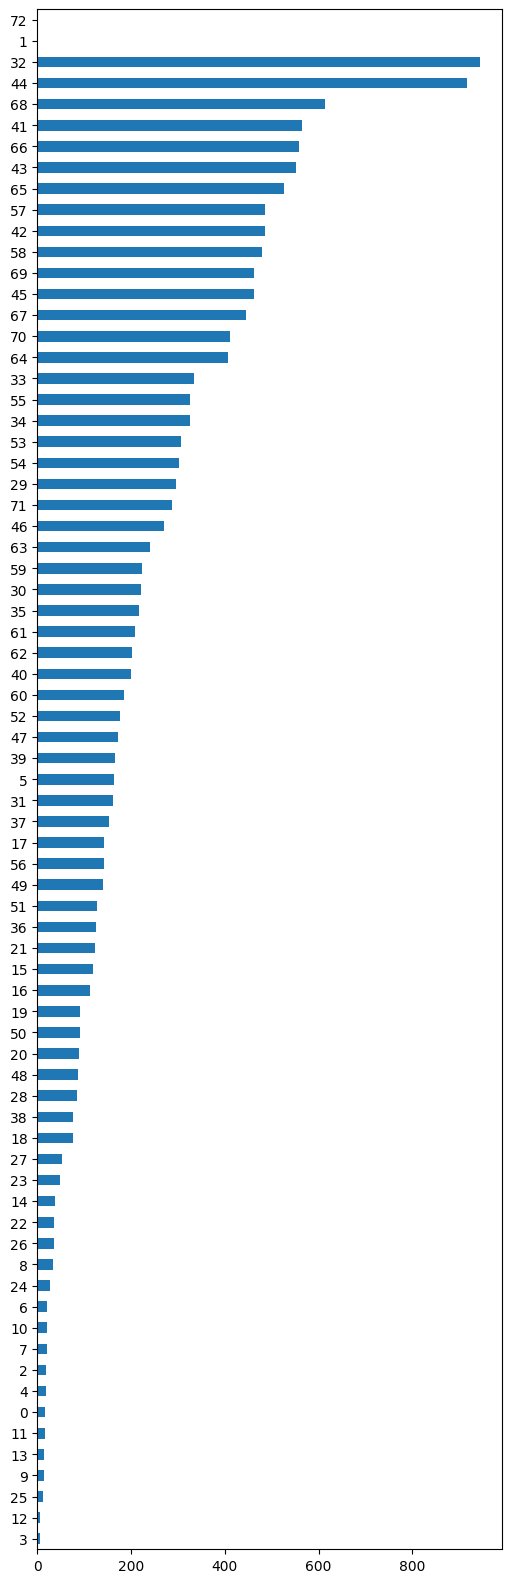

In [29]:
_ = df['Taliban'].sort_values(ascending = False).sort_values().plot(kind='barh', figsize=(6,20))

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [30]:
# your code here
# use many cells if you like to structure your code well

for index, row in df.iterrows():
    print(row['Taliban'])

15.0
nan
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0
nan


In [31]:

filtered_rows = []

for index, row in df.iterrows():
    if row['Taliban']>100:
        filtered_rows.append(row)

filtered_df = pd.DataFrame(filtered_rows)

print(filtered_df)

      Year      Month  Taliban Civilians Afghan forces  \
5   2004.0       June    163.0        32            14   
15  2005.0      April    118.0         5             4   
16  2005.0        May    113.0        49            25   
17  2005.0       June    143.0        31             4   
21  2005.0    October    122.0        15            10   
29  2006.0       June    295.0        71            39   
30  2006.0       July    220.0        64            36   
31  2006.0     August    161.0       101            42   
32  2006.0  September    945.0       172            97   
33  2006.0    October    333.0        44            70   
34  2006.0   November    325.0        46            14   
35  2006.0   December    216.0        51            36   
36  2007.0    January    125.0        53            49   
37  2007.0   February    152.0        33            35   
39  2007.0      April    166.0       123            68   
40  2007.0        May    199.0        71           125   
41  2007.0    

## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.
